In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

In [2]:
df = pd.read_csv("Data/Indonesian Salary by Region (1997-2022).csv")

In [3]:
df.head()

,REGION,SALARY,YEAR
0,ACEH,128000,1997
1,SUMATERA UTARA,151000,1997
2,SUMATERA BARAT,119000,1997
3,RIAU,151500,1997
4,JAMBI,119500,1997


In [4]:
df['REGION'].value_counts()

ACEH                    26
NUSA TENGGARA BARAT     26
INDONESIA               26
PAPUA                   26
MALUKU                  26
SULAWESI TENGGARA       26
SULAWESI SELATAN        26
SULAWESI TENGAH         26
SULAWESI UTARA          26
KALIMANTAN TIMUR        26
KALIMANTAN SELATAN      26
KALIMANTAN TENGAH       26
SUMATERA UTARA          26
NUSA TENGGARA TIMUR     26
KALIMANTAN BARAT        26
BALI                    26
LAMPUNG                 26
SUMATERA BARAT          26
RIAU                    26
JAWA TIMUR              26
SUMATERA SELATAN        26
BENGKULU                26
JAMBI                   26
KEP. RIAU               26
DKI JAKARTA             26
JAWA BARAT              26
JAWA TENGAH             26
DI YOGYAKARTA           26
KEP. BANGKA BELITUNG    25
BANTEN                  25
GORONTALO               25
MALUKU UTARA            25
SULAWESI BARAT          17
PAPUA BARAT             17
KALIMANTAN UTARA         8
Name: REGION, dtype: int64

some region has less data than the other region, because the region was created after 1997

In [5]:
df.describe()

,SALARY,YEAR
count,8.700000e+02,870.000000
mean,1.179872e+06,2009.816092
std,9.175435e+05,7.453930
min,1.060000e+05,1997.000000
25%,4.215000e+05,2003.000000
50%,8.903875e+05,2010.000000
75%,1.867583e+06,2016.000000
max,4.452724e+06,2022.000000


In [6]:
df.groupby(by="YEAR").mean()

,SALARY
YEAR,
1997,1.349643e+05
1998,1.509375e+05
1999,1.753906e+05
2000,2.165062e+05
2001,2.904875e+05
2002,3.645812e+05
2003,4.149281e+05
2004,4.573469e+05
2005,5.076968e+05


## Data Cleaning

In [7]:
df = df[df["REGION"] != "INDONESIA"]

Regional Indonesia doesn't make any sense since it's a country so we dropped it anyway

In [8]:
df['REGION'].value_counts()

ACEH                    26
BALI                    26
PAPUA                   26
MALUKU                  26
SULAWESI TENGGARA       26
SULAWESI SELATAN        26
SULAWESI TENGAH         26
SULAWESI UTARA          26
KALIMANTAN TIMUR        26
KALIMANTAN SELATAN      26
KALIMANTAN TENGAH       26
SUMATERA UTARA          26
NUSA TENGGARA TIMUR     26
NUSA TENGGARA BARAT     26
KALIMANTAN BARAT        26
JAWA TIMUR              26
BENGKULU                26
SUMATERA BARAT          26
RIAU                    26
DI YOGYAKARTA           26
SUMATERA SELATAN        26
JAMBI                   26
LAMPUNG                 26
KEP. RIAU               26
DKI JAKARTA             26
JAWA BARAT              26
JAWA TENGAH             26
KEP. BANGKA BELITUNG    25
BANTEN                  25
GORONTALO               25
MALUKU UTARA            25
SULAWESI BARAT          17
PAPUA BARAT             17
KALIMANTAN UTARA         8
Name: REGION, dtype: int64

In [9]:
df.isnull().sum()

REGION    0
SALARY    0
YEAR      0
dtype: int64

no null data or feature, next data visualization

## Data Visualization


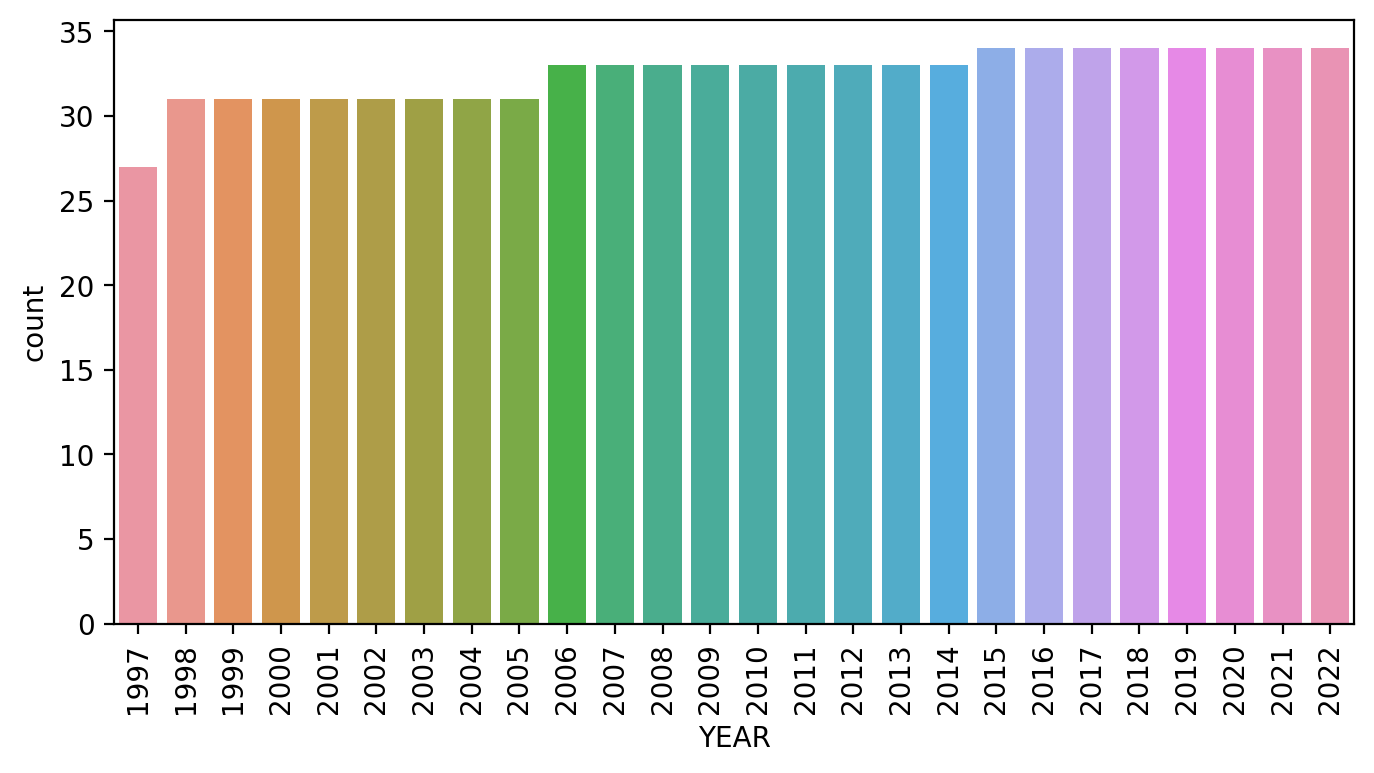

In [10]:
plt.figure(figsize=(8,4), dpi=200)
sns.countplot(x = df['YEAR'])
plt.xticks(rotation=90)
plt.show()

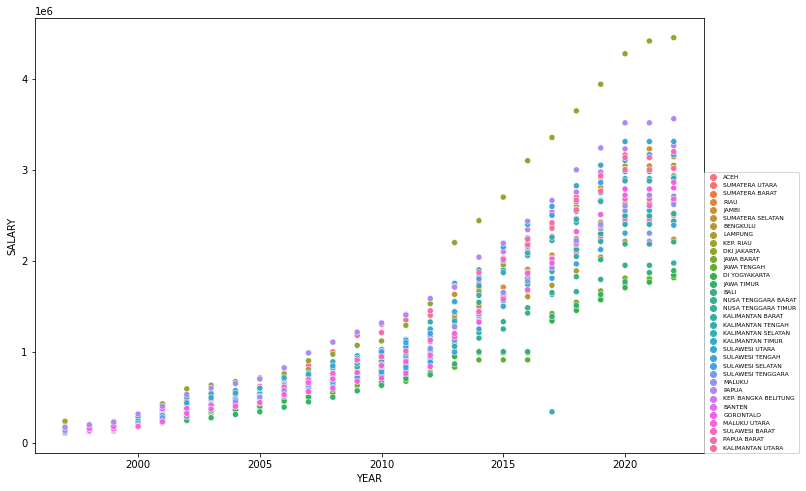

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = df, x='YEAR', y='SALARY', hue='REGION')
plt.legend(loc=(1,0), prop={'size': 6})


In [12]:
X = pd.get_dummies(df.drop("SALARY", axis=1), drop_first = True)

In [13]:
y = df['SALARY']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [20]:
RMSE = []
for n in range(1,6):
    poly = PolynomialFeatures(degree=n)
    feat_poly = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(feat_poly, y, test_size=0.3, random_state=101)
    linear_model = LinearRegression()
    linear_model.fit(X_train,y_train)
    model_prediction = linear_model.predict(X_test)
    RMSE.append(np.sqrt(mean_squared_error(y_test, model_prediction)))

<AxesSubplot:>

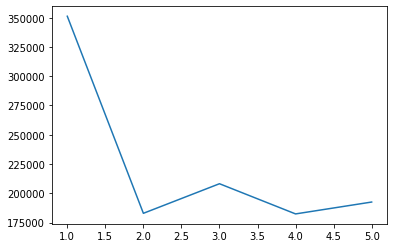

In [23]:
sns.lineplot(x = range(1,6), y = RMSE)

In [25]:
#it's reasonable to choose number of degree of 2 since there's a fall of performance when the number of degree is 3
poly = PolynomialFeatures(degree=2)
feat_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(feat_poly, y, test_size=0.3, random_state=101)
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
model_prediction = linear_model.predict(X_test)
RMSE.append(np.sqrt(mean_squared_error(y_test, model_prediction)))